In [2]:
%%capture

# Install `timbertrek` package
!pip install --upgrade timbertrek

In [3]:
from json import load
import pandas as pd
import timbertrek

In [4]:
timbertrek.__version__

'0.1.7'

In [5]:
!pip install treefarms


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 582.7/582.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.8 MB/s eta 0:00:00


In [13]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from treefarms.model.threshold_guess import compute_thresholds, cut
from treefarms import TREEFARMS
from treefarms.model.model_set import ModelSetContainer
df = pd.read_csv("/content/nafld_timbertrek_1.csv")
X, y = df.iloc[:, :-1], df.iloc[:, -1]
h = df.columns[:-1]
df
# train TREEFARMS model
config = {
    "regularization": 0.005,  # regularization penalizes the tree with more leaves. We recommend to set it to relative high value to find a sparse tree.
    "rashomon_bound_multiplier": 0.2,  # rashomon bound multiplier indicates how large of a Rashomon set would you like to get
}

model = TREEFARMS(config)

model.fit(X, y)
# model.visualize()
# 2. Get the visualization figure
fig = model.visualize()

treefarms reported successful execution
training completed. Number of trees in the Rashomon set: 1137


Generating decision paths from 1136 trees: 100%|██████████| 1136/1136 [00:20<00:00, 56.78it/s]


<iframe
 srcdoc="<!DOCTYPE html><html lang="en"><head><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1.0" /><title>TimberTrek</title><style>html{font-size:16px;-moz-osx-font-smoothing:grayscale;-webkit-font-smoothing:antialiased;text-rendering:optimizeLegibility;-webkit-text-size-adjust:100%;-moz-text-size-adjust:100%}html,body{position:relative;width:100%;height:100%}body{margin:0;padding:0;box-sizing:border-box;font-family:-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Oxygen-Sans,Ubuntu,Cantarell,Helvetica Neue,sans-serif;color:#4a4a4a;font-size:1em;font-weight:400;line-height:1.5}*,:after,:before{box-sizing:inherit}a{color:#0064c8;text-decoration:none}a:hover{text-decoration:underline}a:visited{color:#0050a0}label{display:block}input,button,select,textarea{font-family:inherit;font-size:inherit;-webkit-padding:.4em 0;padding:.4em;margin:0 0 .5em;box-sizing:border-box;border:1px solid #ccc;border-radius:2px}input:disabled{color:#ccc}button{color:#333;background-color:#f4f4f4;outline:none}button:disabled{color:#999}button:not(:disabled):active{background-color:#ddd}button:focus{border-color:#666}</style><script defer src='data:text/javascript;base64,dmFyIEk3PU9iamVjdC5kZWZpbmVQcm9wZXJ0eTt2YXIgRjc9KGllLHplLFMpPT56ZSBpbiBpZT9JNyhpZSx6ZSx7ZW51bWVyYWJsZTohMCxjb25maWd1cmFibGU6ITAsd3JpdGFibGU6ITAsdmFsdWU6U30pOmllW3plXT1TO3ZhciBBPShpZSx6ZSxTKT0+KEY3KGllLHR5cGVvZiB6ZSE9InN5bWJvbCI/emUrIiI6emUsUyksUyksbDI9KGllLHplLFMpPT57aWYoIXplLmhhcyhpZSkpdGhyb3cgVHlwZUVycm9yKCJDYW5ub3QgIitTKX07dmFyIEJsPShpZSx6ZSxTKT0+KGwyKGllLHplLCJyZWFkIGZyb20gcHJpdmF0ZSBmaWVsZCIpLFM/Uy5jYWxsKGllKTp6ZS5nZXQoaWUpKSx2ZT0oaWUsemUsUyk9PntpZih6ZS5oYXMoaWUpKXRocm93IFR5cGVFcnJvcigiQ2Fubm90IGFkZCB0aGUgc2FtZSBwcml2YXRlIG1lbWJlciBtb3JlIHRoYW4gb25jZSIpO3plIGluc3RhbmNlb2YgV2Vha1NldD96ZS5hZGQoaWUpOnplLnNldChpZSxTKX07dmFyIHNlPShpZSx6ZSxTKT0+KGwyKGllLHplLCJhY2Nlc3MgcHJpdmF0ZSBtZXRob2QiKSxTKTt2YXIgdGltYmVydHJlaz1mdW5jdGlvbigpe3ZhciAkcyxjMixlYSx1Mix0YSxoMixuYSxmMixyYSxkMixpYSxwMixzYSxtMixhYSxnMixvYSx2MixsYSx3MixsbixucixjYSx5Mix6aSxZbCx1YSxiMixEaSxoYSx4MixWaSxHbCxmYSxDMixkYSxrMixwYSxTMixtYSxfMixnYSxMMix2YSxUMix3YSxNMixTbixacixBaSxYbCxGcixWYSxQcixBYSx5YSx6MixiYSxEMixfbixCcixJaSxKbCx4YSxWMixDYSxBMixrYSxJMixTYSxGMixfYSxQMixMYSxIMixUYSxFMixNYSxSMixGaSxRbDsidXNlIHN0cmljdCI7ZnVuY3Rpb24gaWUoKXt9Y29uc3QgemU9ZT0+ZTtmdW5jdGlvbiBTKGUsdCxuLHIsaSl7ZS5fX3N2ZWx0ZV9tZXRhPXtsb2M6e2ZpbGU6dCxsaW5lOm4sY29sdW1uOnIsY2hhcjppfX19ZnVuY3Rpb24gS2woZSl7cmV0dXJuIGUoKX1mdW5jdGlvbiAkbCgpe3JldHVybiBPYmplY3QuY3JlYXRlKG51bGwpfWZ1bmN0aW9uIEhlKGUpe2UuZm9yRWFjaChLbCl9ZnVuY3Rpb24gcnIoZSl7cmV0dXJuIHR5cGVvZiBlPT0iZnVuY3Rpb24ifWZ1bmN0aW9uIEtlKGUsdCl7cmV0dXJuIGUhPWU/dD09dDplIT09dHx8ZSYmdHlwZW9mIGU9PSJvYmplY3QifHx0eXBlb2YgZT09ImZ1bmN0aW9uIn1sZXQgWmk7ZnVuY3Rpb24gWXIoZSx0KXtyZXR1cm4gWml8fChaaT1kb2N1bWVudC5jcmVhdGVFbGVtZW50KCJhIikpLFppLmhyZWY9dCxlPT09WmkuaHJlZn1mdW5jdGlvbiBOMihlKXtyZXR1cm4gT2JqZWN0LmtleXMoZSkubGVuZ3RoPT09MH1jb25zdCBlMT10eXBlb2Ygd2luZG93PCJ1IjtsZXQgSWE9ZTE/KCk9PndpbmRvdy5wZXJmb3JtYW5jZS5ub3coKTooKT0+RGF0ZS5ub3coKSxGYT1lMT9lPT5yZXF1ZXN0QW5pbWF0aW9uRnJhbWUoZSk6aWU7Y29uc3QgaXI9bmV3IFNldDtmdW5jdGlvbiB0MShlKXtpci5mb3JFYWNoKHQ9Pnt0LmMoZSl8fChpci5kZWxldGUodCksdC5mKCkpfSksaXIuc2l6ZSE9PTAmJkZhKHQxKX1mdW5jdGlvbiBQYShlKXtsZXQgdDtyZXR1cm4gaXIuc2l6ZT09PTAmJkZhKHQxKSx7cHJvbWlzZTpuZXcgUHJvbWlzZShuPT57aXIuYWRkKHQ9e2M6ZSxmOm59KX0pLGFib3J0KCl7aXIuZGVsZXRlKHQpfX19ZnVuY3Rpb24gbjEoZSx0KXtlLmFwcGVuZENoaWxkKHQpfWZ1bmN0aW9uIFZ0KGUsdCxuKXtjb25zdCByPUhhKGUpO2lmKCFyLmdldEVsZW1lbnRCeUlkKHQpKXtjb25zdCBpPV8oInN0eWxlIik7aS5pZD10LGkudGV4dENvbnRlbnQ9bixyMShyLGkpfX1mdW5jdGlvbiBIYShlKXtpZighZSlyZXR1cm4gZG9jdW1lbnQ7Y29uc3QgdD1lLmdldFJvb3ROb2RlP2UuZ2V0Um9vdE5vZGUoKTplLm93bmVyRG9jdW1lbnQ7cmV0dXJuIHQmJnQuaG9zdD90OmUub3duZXJEb2N1bWVudH1mdW5jdGlvbiBXMihlKXtjb25zdCB0PV8oInN0eWxlIik7cmV0dXJuIHIxKEhhKGUpLHQpLHQuc2hlZXR9ZnVuY3Rpb24gcjEoZSx0KXtyZXR1cm4gbjEoZS5oZWFkfHxlLHQpLHQuc2hlZXR9ZnVuY3Rpb24gaTEoZSx0LG4pe2UuaW5zZXJ0QmVmb3JlKHQsbnx8bnVsbCl9ZnVuY3Rpb24gQmkoZSl7ZS5wYXJlbnROb2RlLnJlbW92ZUNoaWxkKGUpfWZ1bmN0aW9uIGV

<Figure size 640x480 with 0 Axes>

In [32]:
import json

# Function to convert tree to a dictionary
def tree_to_dict(tree):
    tree_dict = {
        "features": list(tree.features()),  # Convert set to list
        "leaves": tree.leaves(),            # No changes needed for leaves (int)
        "nodes": tree.nodes()               # No changes needed for nodes (int)
    }
    return tree_dict

# Initialize a list to hold all the trees
trees_dict = []

# Get the total number of trees
tree_count = model.model_set.get_tree_count()

# Loop through all trees and convert them to a dictionary
for i in range(tree_count):
    tree = model.model_set.get_tree_at_idx(i)
    tree_dict = tree_to_dict(tree)
    trees_dict.append(tree_dict)

# Save all trees to a JSON file
with open("all_sparse_trees.json", "w") as json_file:
    json.dump(trees_dict, json_file, indent=4)

print("All sparse trees saved to all_sparse_trees.json")


All sparse trees saved to all_sparse_trees.json


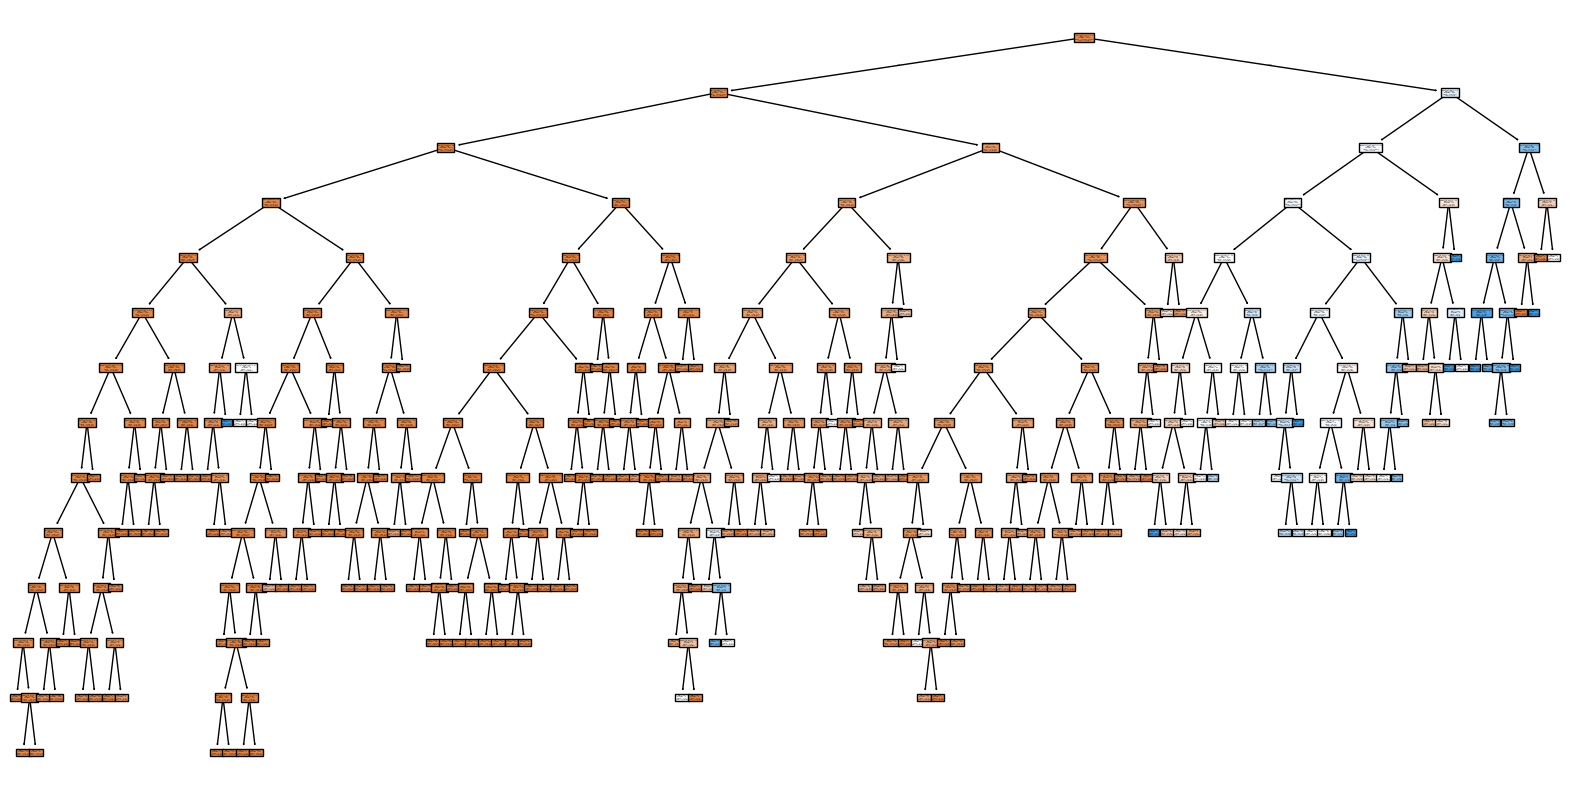

Full Tree Depth: 13
Full Tree Number of Leaves: 191
Full Tree Training Accuracy: 0.9274032708416434
Full Tree Total Nodes: 381
Important Features (non-zero importances):
gender_female: 0.0124
gender_male: 0.0061
age_cat_young: 0.0081
age_cat_senior: 0.2212
age_cat_elderly: 0.6014
bmi_cat_underweight: 0.0084
bmi_cat_normal: 0.0096
bmi_cat_overweight: 0.0150
bmi_cat_obese: 0.0104
height_cat_short: 0.0112
height_cat_avg: 0.0153
height_cat_tall: 0.0175
height_cat_very tall: 0.0113
weight_cat_light: 0.0230
weight_cat_med: 0.0052
weight_cat_heavy: 0.0136
weight_cat_very heavy: 0.0105


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train a full decision tree (very little restriction)
full_tree = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
full_tree.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(full_tree, feature_names=X.columns, class_names=["No NAFLD", "NAFLD"], filled=True)
plt.show()
# For full tree
print("Full Tree Depth:", full_tree.get_depth())
print("Full Tree Number of Leaves:", full_tree.get_n_leaves())
print("Full Tree Training Accuracy:", full_tree.score(X, y))
print("Full Tree Total Nodes:", full_tree.tree_.node_count)
print("Important Features (non-zero importances):")
for feature, importance in zip(X.columns, full_tree.feature_importances_):
    if importance > 0:
        print(f"{feature}: {importance:.4f}")
